In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
from sklearn.pipeline import Pipeline
 # streaming pipelines
from sklearn.base import BaseEstimator, TransformerMixin 
# To create a box-cox transformation class
from collections import Counter

In [2]:
loan_df = pd.read_csv(r"C:\Users\SONY\Downloads\loan_prediction.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
loan_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
loan_df.shape

(614, 13)

In [6]:
loan_df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [7]:
loan_df['Gender'].fillna(loan_df['Gender'].mode()[0], inplace=True)


In [8]:
loan_df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
loan_df['Married'] = loan_df['Married'].fillna(loan_df['Married'].mode()[0])

In [10]:
loan_df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
loan_df['Dependents'] = loan_df['Dependents'].fillna(loan_df['Dependents'].mode()[0])

In [12]:
loan_df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [13]:
loan_df['Self_Employed'] = loan_df['Self_Employed'].fillna(loan_df['Self_Employed'].mode()[0])

In [14]:
loan_df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

<AxesSubplot:xlabel='Loan_Amount_Term'>

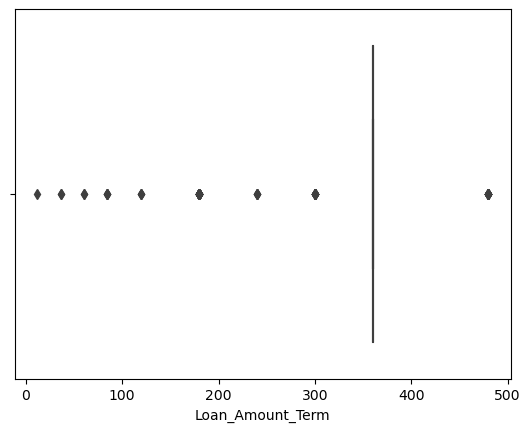

In [15]:
sns.boxplot('Loan_Amount_Term',data=loan_df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

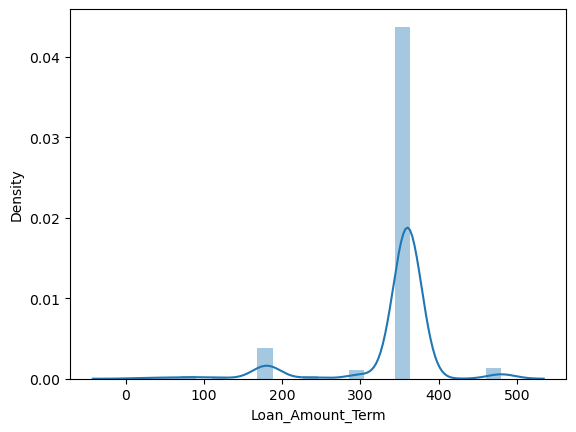

In [16]:
sns.distplot(loan_df['Loan_Amount_Term'])

In [17]:
loan_df['Loan_Amount_Term'] = loan_df['Loan_Amount_Term'].fillna( loan_df['Loan_Amount_Term'].dropna().mode().values[0] )


<AxesSubplot:xlabel='Loan_Amount_Term'>

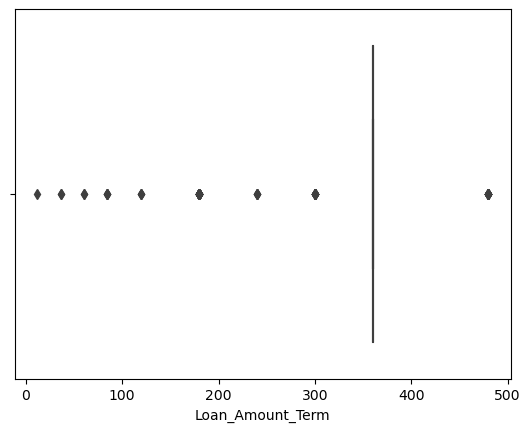

In [18]:
sns.boxplot('Loan_Amount_Term',data=loan_df)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

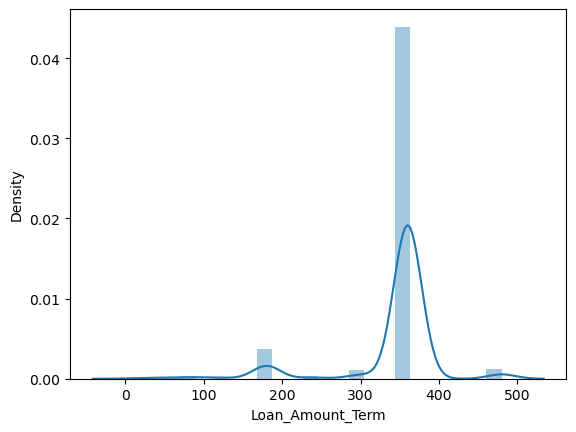

In [19]:
sns.distplot(loan_df['Loan_Amount_Term'])

In [20]:
loan_df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
loan_df['LoanAmount'] = loan_df['LoanAmount'].fillna( loan_df['LoanAmount'].dropna().mean() )


In [22]:
loan_df['Credit_History'] = loan_df['Credit_History'].fillna( loan_df['Credit_History'].dropna().mode().values[0] )


In [23]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [24]:
loan_df.shape

(614, 13)

In [25]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
loan_df['Gender'] = loan_df['Gender'].map({'Female':0,'Male':1})
loan_df['Married'] = loan_df['Married'].map({'No':0, 'Yes':1})
loan_df['Education'] = loan_df['Education'].map({'Not Graduate':0, 'Graduate':1})
loan_df['Self_Employed'] = loan_df['Self_Employed'].map({'No':0, 'Yes':1})
loan_df['Loan_Status'] = loan_df['Loan_Status'].map({'N':0, 'Y':1})


In [27]:
loan_df['Dependents'] = loan_df['Dependents'].str.rstrip('+')


In [28]:
loan_df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [29]:
loan_df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [30]:
loan_df['Property_Area'] = loan_df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':3})


In [31]:
loan_df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents            object
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [32]:
loan_df.Dependents.unique()

array(['0', '1', '2', '3'], dtype=object)

In [33]:
loan_df['Dependents'] = loan_df['Dependents'].astype(int)


In [34]:
loan_df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int32
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

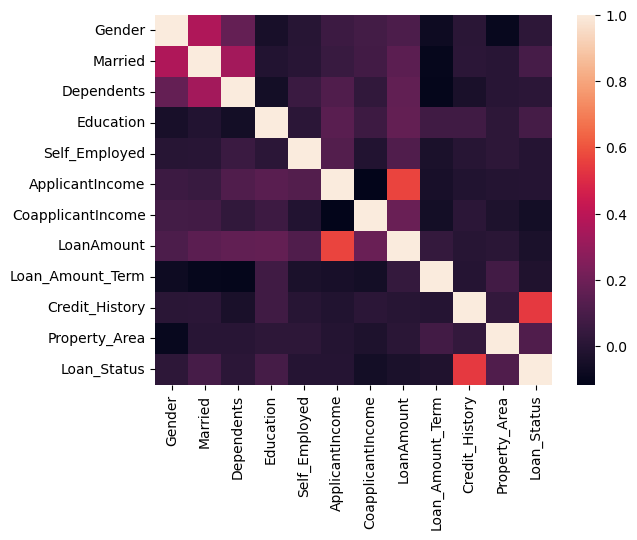

In [35]:
sns.heatmap(loan_df.corr())
plt.show

In [36]:
loan_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [37]:
features = loan_df.drop(columns = ['Loan_Status','Loan_ID'],axis=1)
label= loan_df['Loan_Status']
X = features
Y=label

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state = 0)

In [39]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
lr = LogisticRegression()


In [41]:
lr.fit(X_train,Y_train)

LogisticRegression()

In [42]:
y_pred= lr.predict(X_test)

In [43]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8373983739837398


In [44]:
print("Training Accuracy : {}%".format(lr.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(lr.score(X_test, Y_test) * 100))

Training Accuracy : 80.44806517311609%
Testing Accuracy  : 83.73983739837398%


In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


In [47]:
knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [48]:
y_pred_1= knn.predict(X_test)

In [49]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_1))


Accuracy: 0.7723577235772358


In [50]:
print("Training Accuracy : {}%".format(knn.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(knn.score(X_test, Y_test) * 100))

Training Accuracy : 82.07739307535643%
Testing Accuracy  : 77.23577235772358%


In [55]:
cv_score_lr = cross_val_score(KNeighborsClassifier(),X,Y,cv=10)
print (cv_score_lr.mean()*100)


61.40401903754626


In [56]:
dc = DecisionTreeClassifier()

In [57]:
dc.fit(X_train,Y_train)

DecisionTreeClassifier()

In [58]:
y_pred_2= dc.predict(X_test)

In [59]:
print("Accuracy:",metrics.accuracy_score(Y_test, y_pred))


Accuracy: 0.8373983739837398


In [60]:
print("Training Accuracy : {}%".format(dc.score(X_train, Y_train) * 100))
print("Testing Accuracy  : {}%".format(dc.score(X_test, Y_test) * 100))

Training Accuracy : 100.0%
Testing Accuracy  : 70.73170731707317%


In [61]:
cv_score_lr = cross_val_score(DecisionTreeClassifier(),X,Y,cv=10)
print (cv_score_lr.mean()*100)

70.3781068217874


# TUNING OF MODEL 

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# List Hyperparameters that we want to tune
leaf_size = list(range(1, 30, 5))
n_neighbors = list(range(1, 30))
p = [1, 2]

# Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

# Create new KNN object
knn_2 = KNeighborsClassifier()

# Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

# Fit the model
best_model = clf.fit(X,Y)

# Print the value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Best leaf_size: 1
Best p: 2
Best n_neighbors: 27


In [68]:
# Create a new KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(leaf_size=1, p=2, n_neighbors=27)

# Fit the model on the training data
best_knn.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_5 = best_knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, y_pred_5)

print('Accuracy:', accuracy)

Accuracy: 0.7967479674796748


# LOGISTIC REGRESSION MODEL 

In [69]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

lr_2 = LogisticRegression()
grid_search = GridSearchCV(lr_2, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print('Best hyperparameters:', grid_search.best_params_)




Best hyperparameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [72]:
best_logistic_regression = LogisticRegression(C= 0.1, penalty = 'l2', solver= 'liblinear')
best_logistic_regression.fit(X_train, Y_train)
y_pred = best_logistic_regression.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)




Accuracy: 0.8373983739837398


# FINDINGS 

WE CAN CHECK THE LOGISTIC REGRESSION MODEL IS PERFORMING THE BEST AS IT IS GIVING THE HIGHEST ACCURACY OF 83%


# SAVING OF THE MODEL  

In [73]:
import joblib


In [75]:
filename = 'best_logistic_regression.joblib'
joblib.dump(best_logistic_regression, filename)
print(f"Model saved to {filename}")


Model saved to best_logistic_regression.joblib


In [76]:
# Load the model from the file
filename = 'best_logistic_regression.joblib'
loaded_model = joblib.load(filename)